In [52]:
cd /content/drive/My Drive/deep_learning_exercise/Convolution_in_Tensorflow/horse_and_human_classification


/content/drive/My Drive/deep_learning_exercise/Convolution_in_Tensorflow/horse_and_human_classification


In [53]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O ./horse-or-human.zip

--2020-09-27 21:22:35--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 172.217.214.128, 108.177.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘./horse-or-human.zip’

./horse-or-human.zi 100%[===================>] 142.65M  77.7MB/s    in 1.8s    

2020-09-27 21:22:37 (77.7 MB/s) - ‘./horse-or-human.zip’ saved [149574867/149574867]



In [54]:
import os
import zipfile
import random
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

In [ ]:
local_zip = "./horse-or-human.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('./')

zip_ref.close()


In [55]:
print("number of images of horses : " , len(os.listdir('./horses')) )
print("number of images of horses : " , len(os.listdir('./humans')) )


number of images of horses :  500
number of images of horses :  527


In [ ]:
try :
  os.mkdir("./training/")
  os.mkdir("./validation/")
  os.mkdir("./training/horses/")
  os.mkdir("./training/humans/")
  os.mkdir("./validation/horses/")
  os.mkdir("./validation/humans/")

except OSError:
  pass  

In [31]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  Source_files = os.listdir(SOURCE)
  l = len(Source_files)
  random.sample(Source_files,l)

  traning_size = round(l*SPLIT_SIZE)
  file_train = Source_files[:traning_size]
  file_test = Source_files[traning_size:]
   
  for file_name in file_train:
    path = SOURCE + file_name
    if os.path.getsize(path) > 0 :
      copyfile(path,TRAINING+file_name)

  for file_name in file_test:
    path = SOURCE + file_name
    if os.path.getsize(path) > 0 :
      copyfile(path,TESTING+file_name)    

In [32]:
HORSES_SOURCE_DIR = "./horses/"
HORSES_TRAINING_DIR = "./training/horses/"
HORSES_VALIDATION_DIR = "./validation/horses/"
HUMANS_SOURCE_DIR = "./humans/"
HUMANS_TRAINING_DIR = "./training/humans/"
HUMANS_VALIDATION_DIR = "./validation/humans/"
split_size = .9


In [ ]:
split_data(HUMANS_SOURCE_DIR, HUMANS_TRAINING_DIR, HUMANS_VALIDATION_DIR, split_size)

In [ ]:
split_data(HORSES_SOURCE_DIR, HORSES_TRAINING_DIR, HORSES_VALIDATION_DIR, split_size)

In [56]:
print("the number of training horses images : ", len(os.listdir(HORSES_TRAINING_DIR)) )
print("the number of training humans images : ", len(os.listdir(HORSES_VALIDATION_DIR)) )
print("the number of validation humans images : ", len(os.listdir(HUMANS_TRAINING_DIR)) )
print("the number of validation humans images : ", len(os.listdir(HUMANS_VALIDATION_DIR)) )
  

the number of training horses images :  450
the number of training humans images :  50
the number of validation humans images :  474
the number of validation humans images :  53


take a look at a few pictures to get a better sense of what the cat and dog datasets look like. First, configure the matplot parameters:

#  **Take a look at a few pictures** 

In [57]:
#  configure the matplot parameters:

In [58]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

Now, display a batch of 8 cat and 8 dog pictures. You can rerun the cell to see a fresh batch each time:

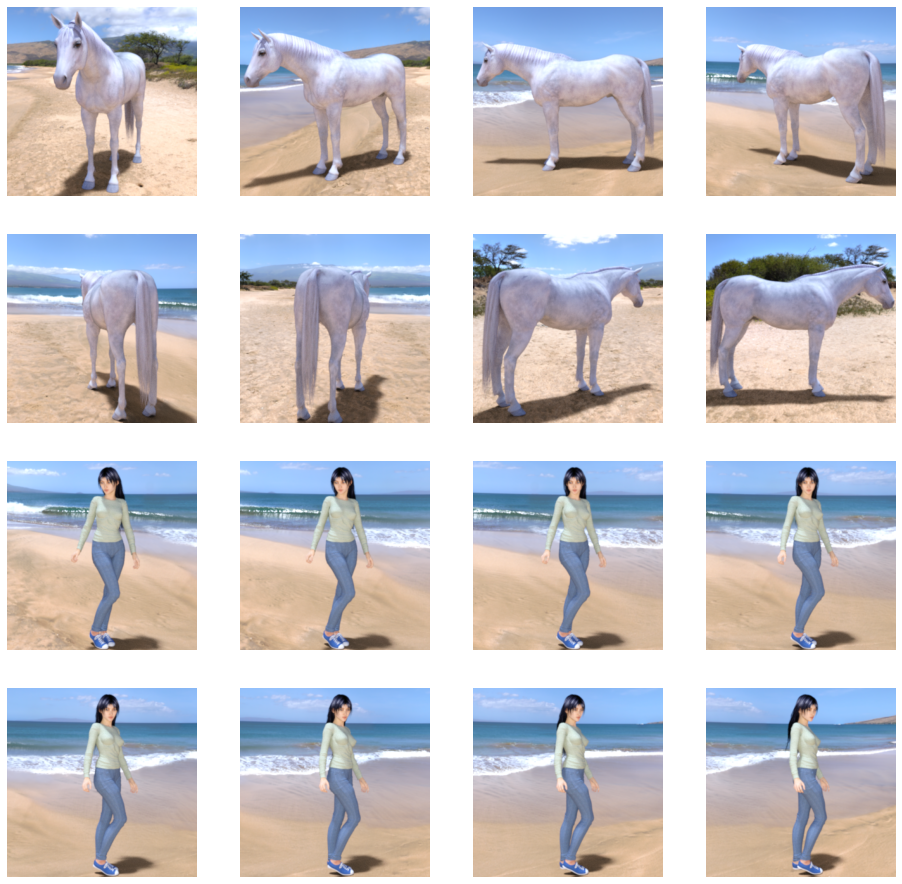

In [59]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

horses_train_names = os.listdir(HORSES_TRAINING_DIR)
humans_train_names = os.listdir(HUMANS_TRAINING_DIR)

next_horses_pix = [os.path.join(HORSES_TRAINING_DIR, fname) 
                for fname in horses_train_names[ pic_index-8:pic_index] 
               ]

next_humans_pix = [os.path.join(HUMANS_TRAINING_DIR, fname) 
                for fname in humans_train_names[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_horses_pix+next_humans_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


# **Building the small model from Scratch**

Note the input shape parameter this time. In the earlier example it was 28x28x1, because the image was 28x28 in greyscale (8 bits, 1 byte for color depth). This time it is 150x150 for the size and 3 (24 bits, 3 bytes) for the color depth.

In [66]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16, (3,3), activation="relu",input_shape = (150,150,3)),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                     tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation="relu"),
                                    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [67]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 15, 15, 64)       

In [68]:
model.compile(loss = "binary_crossentropy",optimizer=RMSprop(lr=0.01),metrics=["accuracy"])

# **Data Preprocessing**


Set up data generators that will read pictures in our source folders, convert them to float32 tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of 20 images of size 150x150 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range).

In Keras this can be done via the **keras.preprocessing.image.ImageDataGenerator** class using the rescale parameter. This **ImageDataGenerator** class allows you to instantiate generators of augmented image batches (and their labels) via **.flow(data, labels)** or .**flow_from_directory(directory)**. These generators can then be used with the Keras model methods that accept data generators as inputs: fit, evaluate_generator, and predict_generator.

In [69]:
from  keras.preprocessing.image import ImageDataGenerator

In [70]:
######## Normalization data 
train_datagen = ImageDataGenerator(rescale=1/255.0) 
validation_datagen = ImageDataGenerator(rescale=1/255.0) 

######## Flow training images, flow validation images

train_generator      = train_datagen.flow_from_directory("./training",
                                                    batch_size = 100 ,
                                                    class_mode = 'binary',
                                                    target_size = (150,150))  

validation_generator = validation_datagen.flow_from_directory("./validation",
                                                    batch_size = 32 ,
                                                    class_mode = 'binary',
                                                    target_size = (150,150))


Found 924 images belonging to 2 classes.
Found 103 images belonging to 2 classes.


In [72]:
history = model.fit(train_generator, 
                    epochs = 15 ,
                    validation_data = validation_generator,
                    validation_steps = 8,
                    verbose = 1)

Epoch 1/15
10/10 [==============================] - 6s 636ms/step - loss: 36.9535 - accuracy: 0.5390 - val_loss: 0.7035 - val_accuracy: 0.5146
Epoch 2/15
10/10 [==============================] - 5s 522ms/step - loss: 0.7553 - accuracy: 0.5541
Epoch 3/15
10/10 [==============================] - 5s 530ms/step - loss: 0.7087 - accuracy: 0.5119
Epoch 4/15
10/10 [==============================] - 5s 531ms/step - loss: 0.6947 - accuracy: 0.5076
Epoch 5/15
10/10 [==============================] - 5s 535ms/step - loss: 0.6845 - accuracy: 0.5617
Epoch 6/15
10/10 [==============================] - 5s 525ms/step - loss: 0.6914 - accuracy: 0.5833
Epoch 7/15
10/10 [==============================] - 6s 570ms/step - loss: 1.0018 - accuracy: 0.4816
Epoch 8/15
10/10 [==============================] - 5s 522ms/step - loss: 5.1182 - accuracy: 0.5400
Epoch 9/15
10/10 [==============================] - 5s 526ms/step - loss: 0.6930 - accuracy: 0.5130
Epoch 10/15
10/10 [==============================] - 5s 5